<a href="https://colab.research.google.com/github/janna-in-sf/first-contributions/blob/master/pswd2_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO 287 Problem Solving with Data Part 2**
### Assignment: 1
### April 10, 2022
### Janna Voss



# Step 1: Import Packages

In [1]:
import pandas as pd
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

### Functions

In [201]:
def print_counts_percentages(f_model_type:str, f_df:pd.DataFrame)->None:
  ''' Print the counts and corresponding percentages in the input DataFrame
      for the input ML model_type (i.e., KMeans, DBSCAN, etc.).'''
  # Verify that the model type is in the DataFrame...
  if f_model_type not in f_df.columns:
    raise ValueError('Cannot find "' + f_model_type +'" in input DataFrame.')
  
  print('For',f_model_type, '- number of clusters:', len(f_df[f_model_type].unique()))
  print('For',f_model_type, '- count and percentage for each cluster: \n')

  #counts = dict(f_df[f_model_type].value_counts())
  #percentages = dict(f_df[f_model_type].value_counts(normalize=True)*100)
  
  #counts_pers = {}
  #for k in counts.keys():
    #counts_pers.update({k:[counts[k],percentages[k]]})
  
  quick_df = f_df[f_model_type].value_counts().to_frame('count')
  quick_df['percentage'] = f_df[f_model_type].value_counts(normalize=True).to_frame()*100
  #quick_df['count'] = counts
  #print('Counts & Percentages:')
  #print(quick_df.loc[:,['count','percentage']]*100)
  #rans = {0:'Not ransomware',1:'Ransomware'}
  #desc = ['count','percentage']
  #print(f'For {f_model_type:10}\t{desc[0]:>8}\t{desc[1]:>7}')
  #print(f'{desc[0]:>16}\t{desc[1]:>7}')
  print(quick_df.loc[:,['count','percentage']])
  #for k in counts_pers.keys():
    #print(f'{k:<4}\t{counts_pers[k][0]:>8}\t{counts_pers[k][1]:>7}')
  


# Step 2: Import Dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# initialize some variables
path = '/content/drive/My Drive/INFO 287 PSWD2/work/assignment 1/'
path_data = path + 'data/'
path_images = path + 'images/'
file = path_data + 'BitCoin_Heist_1-10000_random.csv'

# load the data file
print('loading file:',file)
df=pd.read_csv(file)

loading file: /content/drive/My Drive/INFO 287 PSWD2/work/assignment 1/data/BitCoin_Heist_1-10000_random.csv


### Exploratory Data Analysis...

In [4]:
df.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,115p7UMMngoj1pMvkpHijcRdfJNXj6LrLn,2017,141,0,1.000000e+00,1,0,1,30627600.0,montrealWannaCry
1,1,121P5TiHimHace3ZNuXU4hde9kWqPE1jHC,2016,161,0,5.000000e-01,1,0,2,120000000.0,montrealCryptXXX
2,2,128meNE6VGJqDX4H66bdugPCTo9DbhD7H7,2014,92,6,4.500000e-02,2,0,1,70000000.0,paduaCryptoWall
3,3,128nmHJi2jjuJqDpf22996fp3ct5saE4SK,2013,331,144,5.060000e-12,5773,0,1,50000000.0,montrealCryptoLocker
4,4,12AoTWahn6ryPbRHUJsibDvXSHMeZZz2AT,2014,167,2,1.000000e+00,2,0,1,84080812.0,paduaCryptoWall


In [5]:
df.tail()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
9995,9995,14ikWkcqf65pkG34yZYwm7SvsHba3jA9HS,2013,239,0,1.000000,1,0,2,43688563.0,white
9996,9996,1FLdecqvXrv6LzCVmKqwFR8Mkf1Lk6MB4b,2013,239,144,0.024036,837,0,2,117026433.0,white
9997,9997,1CMhMomtXDyi4rXycHabpJ6hYg3meBnWyi,2013,239,0,1.000000,1,0,1,110340000.0,white
9998,9998,1PKKeW4HWW5zSJig1wNnLKMACdSRVGY14f,2013,239,144,1.586079,1953,1,3,299630000.0,white
9999,9999,1ALT89skLDioJwiGrViB4Q9Uz6tF8haVhw,2013,239,8,0.250000,1,0,2,252000000.0,white


In [14]:
print('Number of rows, columns:',df.shape,'\n\nDescriptive statistics:\n')
df.describe()

Number of rows, columns: (10000, 11) 

Descriptive statistics:



,Unnamed: 0,year,day,length,weight,count,looped,neighbors,income
count,10000.00000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,4999.50000,2012.010200,168.51550,26.469600,4.760423e-01,155.662700,33.248200,2.070100,8.283047e+09
std,2886.89568,1.002096,100.60638,42.644293,1.537253e+00,592.082094,267.383939,10.863839,1.050166e+11
min,0.00000,2011.000000,1.00000,0.000000,5.370000e-87,1.000000,0.000000,1.000000,3.000000e+07
25%,2499.75000,2011.000000,83.00000,0.000000,1.667722e-02,1.000000,0.000000,1.000000,1.090000e+08
50%,4999.50000,2012.000000,161.00000,6.000000,2.500000e-01,1.000000,0.000000,2.000000,5.070000e+08
75%,7499.25000,2013.000000,247.00000,30.000000,5.159341e-01,10.000000,0.000000,2.000000,2.543000e+09
max,9999.00000,2017.000000,365.00000,144.000000,9.142633e+01,8644.000000,4668.000000,592.000000,5.500000e+12


In [16]:
# Display column names
df.columns

Index(['Unnamed: 0', 'address', 'year', 'day', 'length', 'weight', 'count',
       'looped', 'neighbors', 'income', 'label'],
      dtype='object')

### Clean/Modify as required

In [19]:
# Check for nulls
if df.isnull().sum().sum()==0:
  print('No nulls found')
else:
  print('Need to address nulls')

# Check for duplicate rows
print('Number of duplicate rows:', df.duplicated().sum())

No nulls found
Number of duplicate rows: 0


In [ ]:
#from numpy import NaN
#   TEST CELL Will remove

data = [['tom', 10], ['nick', 15], ['julie', 14],['sara', 10],['bob',12],['bob',12]]
df_test = pd.DataFrame(data, columns = ['Name', 'Age'])
#df_test.duplicated().value_counts()
#s = df_test.duplicated().value_counts()
#print('Number of duplicate rows:',df_test.duplicated().sum())
#df_test.isnull().sum().sum()
#my_list = s.tolist()
#print(s)
#if df_test.shape[0] == s.count() : print ('True')

# Check for nulls
if df_test.isnull().sum().sum()==0:
  print('No nulls found')
else:
  print('Need to address nulls')


In [20]:
# column names & types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   address     10000 non-null  object 
 2   year        10000 non-null  int64  
 3   day         10000 non-null  int64  
 4   length      10000 non-null  int64  
 5   weight      10000 non-null  float64
 6   count       10000 non-null  int64  
 7   looped      10000 non-null  int64  
 8   neighbors   10000 non-null  int64  
 9   income      10000 non-null  float64
 10  label       10000 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


In [21]:
# Dimensionality reduction: 
#   Create new dataframe, without 'address' and 'Unnamed: 0' columns
df_mod1 = df.drop(['address', 'Unnamed: 0'], axis=1)
df_mod1.dtypes

year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label         object
dtype: object

In [22]:
df_mod1.head()

,year,day,length,weight,count,looped,neighbors,income,label
0,2017,141,0,1.000000e+00,1,0,1,30627600.0,montrealWannaCry
1,2016,161,0,5.000000e-01,1,0,2,120000000.0,montrealCryptXXX
2,2014,92,6,4.500000e-02,2,0,1,70000000.0,paduaCryptoWall
3,2013,331,144,5.060000e-12,5773,0,1,50000000.0,montrealCryptoLocker
4,2014,167,2,1.000000e+00,2,0,1,84080812.0,paduaCryptoWall


In [ ]:
# Will remove - this is now in cell below

# For values in label column remove text 'padua', 'montreal', 'princeton' 


# Q: do I really need an new/extra dataframe? 
#    the new datafame does let me print the diff in cell below
df_mod2 = df_mod1.copy()

df_mod2['label'] = df_mod2['label'].replace({'padua' : "" }, regex=True)
df_mod2['label'] = df_mod2['label'].replace({'montreal' : "" }, regex=True)
df_mod2['label'] = df_mod2['label'].replace({'princeton' : "" }, regex=True)

In [23]:
# For values in label column remove text 'padua', 'montreal', 'princeton' 

print('*** Before cleaning...')
print(df_mod1['label'].value_counts())

df_mod1['label'] = df_mod1['label'].replace({'padua' : "" }, regex=True)
df_mod1['label'] = df_mod1['label'].replace({'montreal' : "" }, regex=True)
df_mod1['label'] = df_mod1['label'].replace({'princeton' : "" }, regex=True)

print('\n*** After cleaning...')
print(df_mod1['label'].value_counts())

*** Before cleaning...
white                    9583
paduaCryptoWall           137
montrealCryptoLocker       90
princetonCerber            85
princetonLocky             72
montrealCryptXXX           25
montrealDMALockerv3         3
montrealGlobeImposter       2
montrealWannaCry            1
montrealVenusLocker         1
montrealNoobCrypt           1
Name: label, dtype: int64

*** After cleaning...
white            9583
CryptoWall        137
CryptoLocker       90
Cerber             85
Locky              72
CryptXXX           25
DMALockerv3         3
GlobeImposter       2
WannaCry            1
VenusLocker         1
NoobCrypt           1
Name: label, dtype: int64


In [ ]:
# Will remove, now in cell above

# Print count for label values...
print('*** Before cleaning...')
print(df_mod1['label'].value_counts())
del df_mod1

print('\n*** After cleaning...')
print(df_mod2['label'].value_counts())

** Before cleaning...
white                    9583
paduaCryptoWall           137
montrealCryptoLocker       90
princetonCerber            85
princetonLocky             72
montrealCryptXXX           25
montrealDMALockerv3         3
montrealGlobeImposter       2
montrealWannaCry            1
montrealVenusLocker         1
montrealNoobCrypt           1
Name: label, dtype: int64

** After cleaning...
white            9583
CryptoWall        137
CryptoLocker       90
Cerber             85
Locky              72
CryptXXX           25
DMALockerv3         3
GlobeImposter       2
WannaCry            1
VenusLocker         1
NoobCrypt           1
Name: label, dtype: int64


In [25]:
# Convert all label values from text to numeric.  
#  'white' should be made 0, while all other value in 'label' column should be 1
#  (Instances for 'white' are not ransomware while the rest are ransomware)

# set label w/value of white to 0 and all others to 1, convert column to int
df_mod1.loc[df_mod1.label == 'white', 'label'] = 0
df_mod1.loc[df_mod1.label != 0, 'label'] = 1
df_mod1['label'] = df_mod1['label'].astype(str).astype(int)

# verify
print(df_mod1['label'].value_counts(),'\n')
df_mod1.dtypes

0    9583
1     417
Name: label, dtype: int64 



year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label          int64
dtype: object

In [26]:
df_mod1.head()

,year,day,length,weight,count,looped,neighbors,income,label
0,2017,141,0,1.000000e+00,1,0,1,30627600.0,1
1,2016,161,0,5.000000e-01,1,0,2,120000000.0,1
2,2014,92,6,4.500000e-02,2,0,1,70000000.0,1
3,2013,331,144,5.060000e-12,5773,0,1,50000000.0,1
4,2014,167,2,1.000000e+00,2,0,1,84080812.0,1


In [24]:
# MAY REMOVE see above cell

# Convert all label values from text to numeric.  
#  'white' should be made 0, while all other value in 'label' column should be 1
#  (Instances for 'white' are not ransomware while the rest are ransomwares)
#df_final = df_mod2.copy()
#del df_mod2

df_final = df_mod1.copy()

# Q: again, do I need to create a new dataframe for this?
#   why not just use df_mod2?


# set label w/value of white to 0 and all others to 1, convert column to int
df_final.loc[df_final.label == 'white', 'label'] = 0
df_final.loc[df_final.label != 0, 'label'] = 1
df_final['label'] = df_final['label'].astype(str).astype(int)

# verify
print(df_final['label'].value_counts(),'\n')
df_final.dtypes

0    9583
1     417
Name: label, dtype: int64 



year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label          int64
dtype: object

# Step 3: Build Model

In [27]:
# Create dataframe X from modified dataframe
#X = pd.DataFrame(data=df_final)
X = pd.DataFrame(data=df_mod1)
del df_mod1

### Attempt to determine ideal number of clusters

In [28]:
# Attempt to determine ideal nbr of clusters using elbow method
#  wcss -> Within-Cluster-Sum-of-Squares 
#          (sum of squared distance btwn each point & centroid in a cluster)

E = X.iloc[:,:].values # consider values from all rows, all columns
wcss = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(E) 
    wcss.append(kmeans.inertia_) 

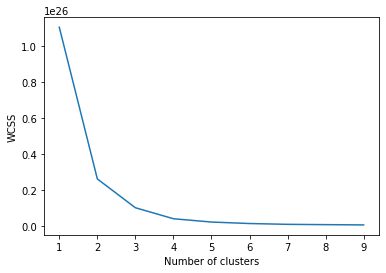

In [29]:
# plot the elbow
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### Use KMeans algorithm to cluster

In [30]:
# Create and fit KMeans model w/2 clusters
nbr_clusters = 2
model_type = 'KMeans'
model_types = [model_type]
model = KMeans(n_clusters=nbr_clusters)

# KMeans, compute cluster centers & predict cluster index for each sample 
#   (returns index of cluster each sample belongs to)
y = model.fit_predict(X)
print(y[0:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
# Add clustering index as column in original dataframe
#  use model_type as column name
df[model_type] = y

# Q: do I need to do this?
#del y 

# verify
print('dataframe columns:\n', df.columns)

dataframe columns:
 Index(['Unnamed: 0', 'address', 'year', 'day', 'length', 'weight', 'count',
       'looped', 'neighbors', 'income', 'label', 'KMeans'],
      dtype='object')


In [177]:
# TEST cell will delete

my_list = ['a','c','c','x','x','a','a','a']
my_series = pd.Series(my_list)

counts = dict(my_series.value_counts())
pers = dict(my_series.value_counts(normalize=True))
my_dict = {}
for item in counts.keys():
  my_dict.update({item:[counts[item],pers[item]]})
print(my_dict)
#d = counts.


#quick_df = my_series.value_counts(normalize=True).to_frame()
#quick_df.columns = ['percentage']
#quick_df['count'] = counts
#print('Counts & Percentages:')
#print(quick_df.loc[:,['count','percentage']]*100)


{'a': [4, 0.5], 'c': [2, 0.25], 'x': [2, 0.25]}


In [202]:
# Print counts and percentages for each label
# Note that it clustered so many into a single cluster
#  (about 5% is ransomware, so it appears to be grouping by 'label')
#print('For',model_type, '- number of clusters:', len(df[model_type].unique()))
#print('For',model_type, '- count and percentage for each cluster: \n')

print_counts_percentages(model_type,df)
# From dataset link: "Note that although we are certain about ransomware labels, 
#    we do not know if all white addresses are in fact not related to ransomware."

For KMeans - number of clusters: 2
For KMeans - count and percentage for each cluster: 

   count  percentage
0   9995       99.95
1      5        0.05


In [203]:
# Trying again, with KMeans++
# Create and fit KMeans model w/2 clusters
model_type = 'KMeans++'
model_types.append(model_type)
model_plus = KMeans(n_clusters=nbr_clusters, init='k-means++')

# KMeans, compute cluster centers & predict *cluster index* for each sample 
#   (returns index of the cluster each sample belongs to)
y = model_plus.fit_predict(X)
print(y[0:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [204]:
# Add clustering index as column in original dataframe, use model_type as column name
df[model_type] = y
del y
print('dataframe columns:\n', df.columns)

dataframe columns:
 Index(['Unnamed: 0', 'address', 'year', 'day', 'length', 'weight', 'count',
       'looped', 'neighbors', 'income', 'label', 'KMeans', 'KMeans++'],
      dtype='object')


In [206]:
#print('For',model_type, '- number of clusters:', len(df[model_type].unique()))
#print('For',model_type,'- count for each cluster: \n', df[model_type].value_counts())
#print('For',model_type,'count and percentage for each cluster: \n')
# exactly the same... actually I think this algorithm does the same thing, only faster

print_counts_percentages(model_type,df)

For KMeans++ - number of clusters: 2
For KMeans++ - count and percentage for each cluster: 

   count  percentage
0   9995       99.95
1      5        0.05


### Try DBSAN Clustering

In [207]:
# DBSCAN Model - create model with radius & minimum nbr of data points
model_type = 'DBSCAN'
model_types.append(model_type)
model_dbscan = DBSCAN(eps=10, min_samples=10)

# DBSCAN: Compute clusters from a data or distance matrix & predict *labels*
#   (returns Cluster labels. Noisy samples are given the label -1)
y = model_dbscan.fit_predict(X)
print(y[0:30])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [208]:
# Add clustering index as column in original dataframe, use model_type as column name
df[model_type] = y
del y
print('dataframe columns:\n', df.columns)

dataframe columns:
 Index(['Unnamed: 0', 'address', 'year', 'day', 'length', 'weight', 'count',
       'looped', 'neighbors', 'income', 'label', 'KMeans', 'KMeans++',
       'DBSCAN'],
      dtype='object')


In [209]:
#print('For',model_type, '- number of clusters:', len(df[model_type].unique()))
#print('For',model_type, '- count for each cluster: \n', df[model_type].value_counts())
# -1 refers to noisy data
print_counts_percentages(model_type,df)

For DBSCAN - number of clusters: 6
For DBSCAN - count and percentage for each cluster: 

    count  percentage
-1   9734       97.34
 1    143        1.43
 2     68        0.68
 4     30        0.30
 0     14        0.14
 3     11        0.11


### Try Hierachical Clustering

In [ ]:
# Note the textbook has code to create a dendrogram for it's expample of hierachical clusters
#   should i create a dendrogram? Need to review why it would tell me. pp 456

In [210]:
# Creat agglomerative model 
# (Recursively merges pair of clusters of sample data; uses linkage distance)
model_type = 'Agglomerative'
model_types.append(model_type)
model_agg = AgglomerativeClustering(n_clusters=nbr_clusters)

# Fit & return result of each sample's clustering assignment
y = model_agg.fit_predict(X)

In [211]:
# Add clustering index as column in original dataframe
#  use model_type as column name
df[model_type] = y

# Consider removing the line below...
del y

print('dataframe columns:\n', df.columns)

dataframe columns:
 Index(['Unnamed: 0', 'address', 'year', 'day', 'length', 'weight', 'count',
       'looped', 'neighbors', 'income', 'label', 'KMeans', 'KMeans++',
       'DBSCAN', 'Agglomerative'],
      dtype='object')


In [212]:
#print('For',model_type, '- number of clusters:', len(df[model_type].unique()))
#print('For',model_type, '- count for each cluster: \n', df[model_type].value_counts())
print_counts_percentages(model_type,df)

For Agglomerative - number of clusters: 2
For Agglomerative - count and percentage for each cluster: 

   count  percentage
0   9997       99.97
1      3        0.03


In [ ]:
# Q: should I add code to vliew cluster assignments? Textbook p. 468

# Step 4: Visualize

In [213]:
# Primary Component Analysis (concept: "dimensionality reduction")
#   Use PCA to reduce nbr of features 

# set nbr of components to keep = 2
pca_num_components=2

# fit_transform: Fit model with X and apply dimensionality reduction on X
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# create new dataframe containing the 2 columns
results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])

Saving image to: /content/drive/My Drive/INFO 287 PSWD2/work/assignment 1/images/KMeans.jpg 



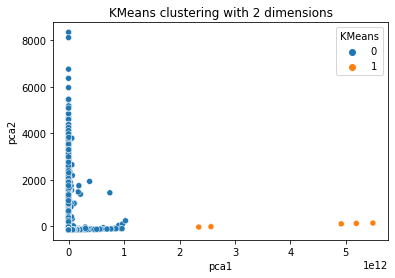

Saving image to: /content/drive/My Drive/INFO 287 PSWD2/work/assignment 1/images/KMeans++.jpg 



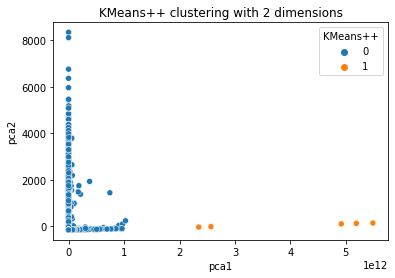

Saving image to: /content/drive/My Drive/INFO 287 PSWD2/work/assignment 1/images/DBSCAN.jpg 



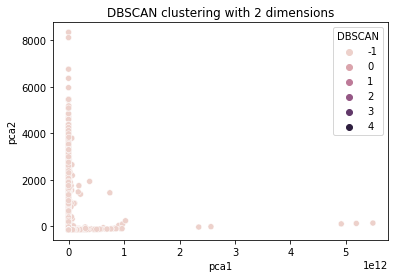

Saving image to: /content/drive/My Drive/INFO 287 PSWD2/work/assignment 1/images/Agglomerative.jpg 



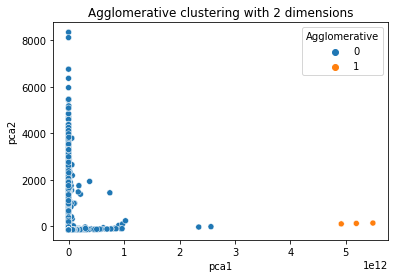

In [214]:
# Create Scatterplots for each model type,
#   set colors using column added for model type
for model_type in model_types:
  sns.scatterplot(x='pca1', y='pca2', hue=df[model_type], data=results)
  plt.title(model_type + ' clustering with 2 dimensions')
  image_file_name = path_images + model_type + '.jpg'
  print('Saving image to:', image_file_name,'\n')
  plt.savefig(image_file_name)
  plt.show()

# Step 5: Evaluation

# Print metrics

In [ ]:
# Loop thru models, calculate silhoutte avg, display
for model_type in model_types:
  silhoutte_avg = silhouette_score(X,df[model_type])
  print(f'{model_type:20}\t{silhoutte_avg:>20}')

KMeans              	  0.9969333877148067
KMeans++            	  0.9969333877148067
DBSCAN              	 -0.7786006639596781
Agglomerative       	  0.9975153402023031
